In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [36]:
df = pd.read_csv('data/jitesh_monkeytype.csv', sep='|')
df.dtypes

_id                       object
isPb                      object
wpm                      float64
acc                      float64
rawWpm                   float64
consistency              float64
charStats                 object
mode                      object
mode2                      int64
quoteLength                int64
restartCount               int64
testDuration             float64
afkDuration                int64
incompleteTestSeconds    float64
punctuation                 bool
numbers                     bool
language                  object
funbox                    object
difficulty                object
lazyMode                    bool
blindMode                   bool
bailedOut                   bool
tags                     float64
timestamp                  int64
dtype: object

In [37]:
df.head()

,_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,...,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
0,65150e1d36bd0a3b02134143,NaN,115.77,94.94,122.37,76.52,"579,6,4,0",time,60,-1,...,False,False,english,none,normal,False,False,False,NaN,1695878685000
1,65150d5736bd0a3b02133b54,NaN,122.19,95.61,129.99,79.27,"611,13,0,2",time,60,-1,...,False,False,english,none,normal,False,False,False,NaN,1695878487000
2,65150cc636bd0a3b021336c7,NaN,125.98,96.85,132.38,81.70,"630,10,1,0",time,60,-1,...,False,False,english,none,normal,False,False,False,NaN,1695878342000
3,65145fce36bd0a3b02abdc02,NaN,114.57,95.10,125.37,77.74,"573,12,4,2",time,60,-1,...,False,False,english,none,normal,False,False,False,NaN,1695834062000
4,65145de936bd0a3b02a48a7a,NaN,127.17,97.59,131.37,79.54,"636,5,0,4",time,60,-1,...,False,False,english,none,normal,False,False,False,NaN,1695833577000


In [38]:
df['isPb'].fillna(False,inplace=True)
df['tags'].fillna(0.0,inplace=True)
df.head()

,_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,...,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
0,65150e1d36bd0a3b02134143,False,115.77,94.94,122.37,76.52,"579,6,4,0",time,60,-1,...,False,False,english,none,normal,False,False,False,0.0,1695878685000
1,65150d5736bd0a3b02133b54,False,122.19,95.61,129.99,79.27,"611,13,0,2",time,60,-1,...,False,False,english,none,normal,False,False,False,0.0,1695878487000
2,65150cc636bd0a3b021336c7,False,125.98,96.85,132.38,81.70,"630,10,1,0",time,60,-1,...,False,False,english,none,normal,False,False,False,0.0,1695878342000
3,65145fce36bd0a3b02abdc02,False,114.57,95.10,125.37,77.74,"573,12,4,2",time,60,-1,...,False,False,english,none,normal,False,False,False,0.0,1695834062000
4,65145de936bd0a3b02a48a7a,False,127.17,97.59,131.37,79.54,"636,5,0,4",time,60,-1,...,False,False,english,none,normal,False,False,False,0.0,1695833577000


In [39]:
df['wpm'].describe()

count    631.000000
mean     109.229239
std        6.852036
min       88.790000
25%      104.990000
50%      109.180000
75%      113.585000
max      128.590000
Name: wpm, dtype: float64

In [40]:
df.loc[
    (
        (df['mode'] == 'time') &
        (df['mode2'] == 60)
    )
].describe()

,wpm,acc,rawWpm,consistency,mode2,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,tags,timestamp
count,631.000000,631.000000,631.000000,631.000000,631.0,631.0,631.000000,631.000000,631.0,631.000000,631.0,6.310000e+02
mean,109.229239,95.429445,115.322044,75.478051,60.0,-1.0,7.380349,60.006593,0.0,61.057448,0.0,1.686061e+12
std,6.852036,1.325438,7.160452,3.060846,0.0,0.0,7.928922,0.006012,0.0,67.605636,0.0,6.743735e+09
min,88.790000,88.710000,92.400000,65.050000,60.0,-1.0,0.000000,60.000000,0.0,0.000000,0.0,1.666621e+12
25%,104.990000,94.550000,110.490000,73.350000,60.0,-1.0,2.000000,60.000000,0.0,12.675000,0.0,1.681488e+12
50%,109.180000,95.600000,114.960000,75.520000,60.0,-1.0,5.000000,60.010000,0.0,41.180000,0.0,1.684596e+12
75%,113.585000,96.340000,119.795000,77.610000,60.0,-1.0,9.000000,60.010000,0.0,87.010000,0.0,1.691917e+12
max,128.590000,98.890000,134.980000,83.260000,60.0,-1.0,53.000000,60.040000,0.0,491.310000,0.0,1.695879e+12


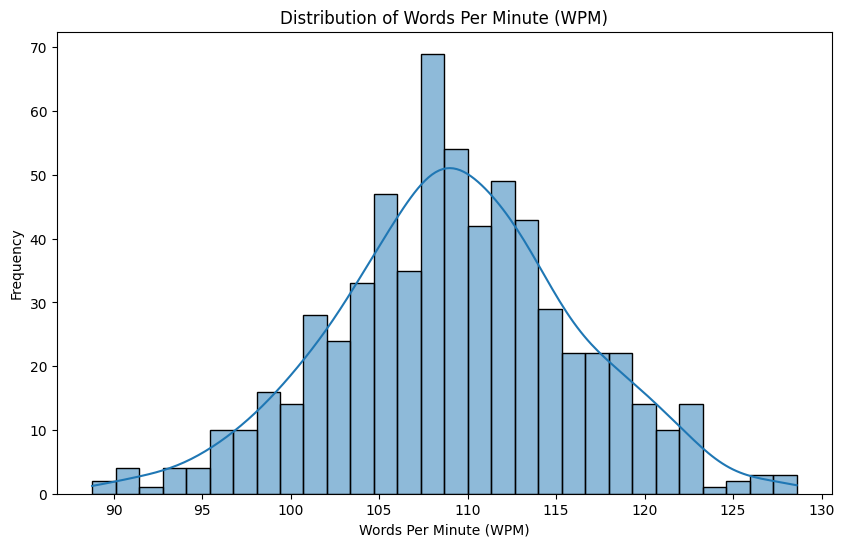

In [41]:

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['wpm'], bins=30, kde=True) 
plt.xlabel('Words Per Minute (WPM)')
plt.ylabel('Frequency')
plt.title('Distribution of Words Per Minute (WPM)')
plt.show()

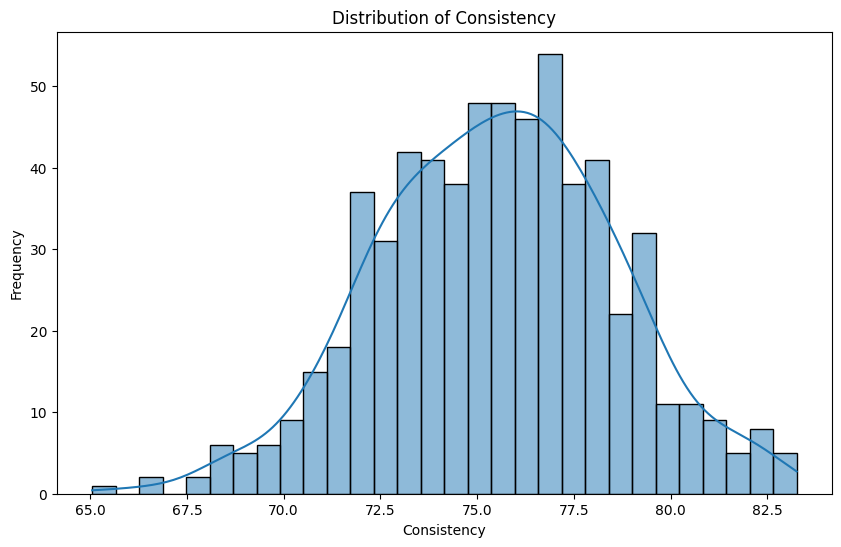

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['consistency'], bins=30, kde=True) 
plt.xlabel('Consistency')
plt.ylabel('Frequency')
plt.title('Distribution of Consistency')
plt.show()

In [43]:
df.dtypes

_id                       object
isPb                        bool
wpm                      float64
acc                      float64
rawWpm                   float64
consistency              float64
charStats                 object
mode                      object
mode2                      int64
quoteLength                int64
restartCount               int64
testDuration             float64
afkDuration                int64
incompleteTestSeconds    float64
punctuation                 bool
numbers                     bool
language                  object
funbox                    object
difficulty                object
lazyMode                    bool
blindMode                   bool
bailedOut                   bool
tags                     float64
timestamp                  int64
dtype: object

In [44]:
typ_speed = df['wpm']
typ_speed

0      115.77
1      122.19
2      125.98
3      114.57
4      127.17
        ...  
626     97.37
627     93.40
628    103.38
629     96.38
630    101.38
Name: wpm, Length: 631, dtype: float64

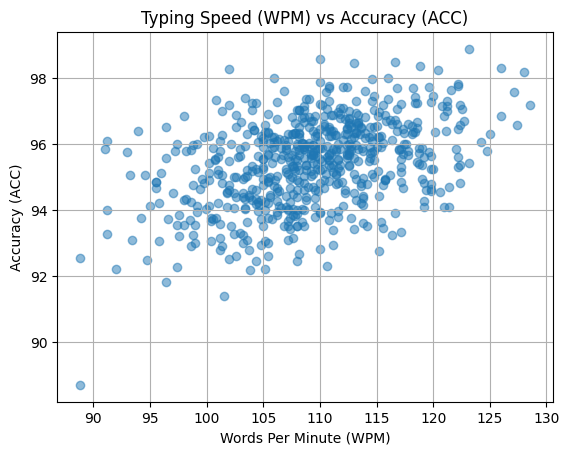

In [45]:
plt.scatter(df['wpm'], df['acc'], alpha=0.5)  
plt.xlabel('Words Per Minute (WPM)')
plt.ylabel('Accuracy (ACC)')
plt.title('Typing Speed (WPM) vs Accuracy (ACC)')
plt.grid(True)
plt.show()

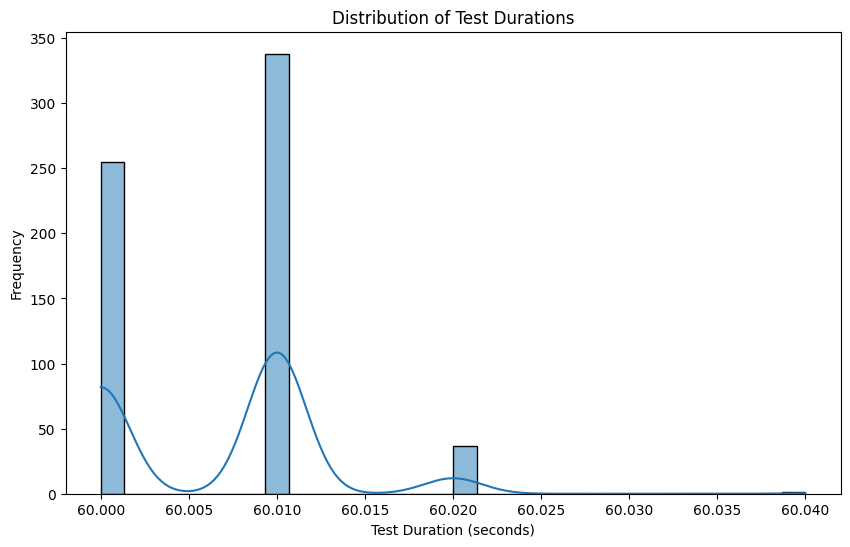

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['testDuration'], bins=30, kde=True) 
plt.xlabel('Test Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Test Durations')
plt.show()

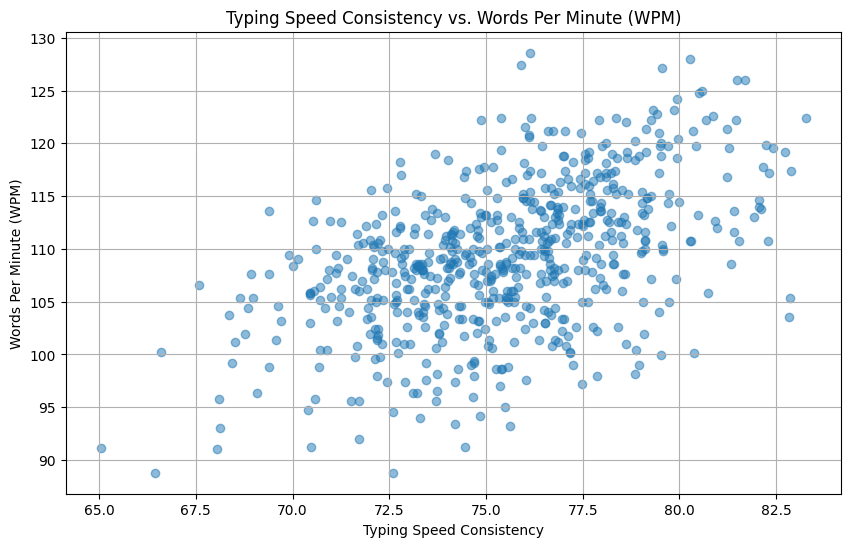

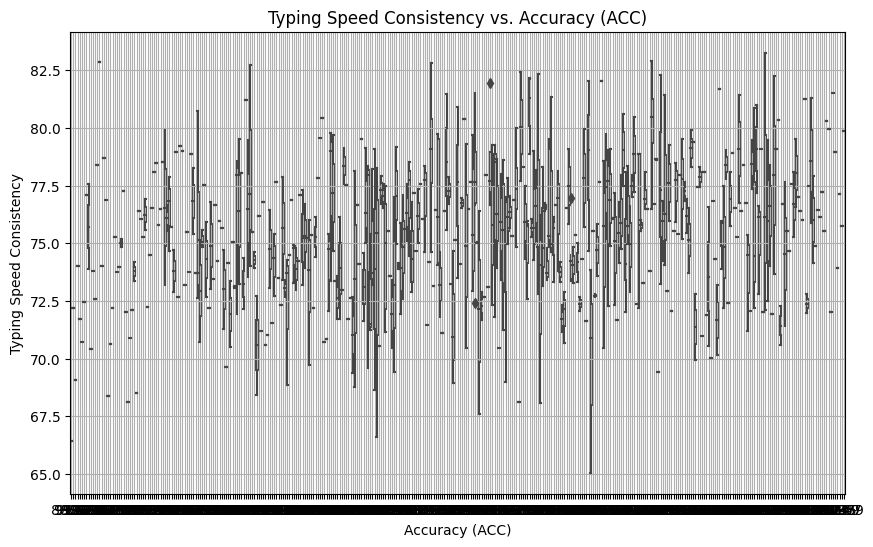

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df['consistency'], df['wpm'], alpha=0.5)
plt.xlabel('Typing Speed Consistency')
plt.ylabel('Words Per Minute (WPM)')
plt.title('Typing Speed Consistency vs. Words Per Minute (WPM)')
plt.grid(True)
plt.show()

# Box plot: Consistency grouped by Accuracy (ACC)
plt.figure(figsize=(10, 6))
sns.boxplot(x='acc', y='consistency', data=df)
plt.xlabel('Accuracy (ACC)')
plt.ylabel('Typing Speed Consistency')
plt.title('Typing Speed Consistency vs. Accuracy (ACC)')
plt.grid(True)
plt.show()

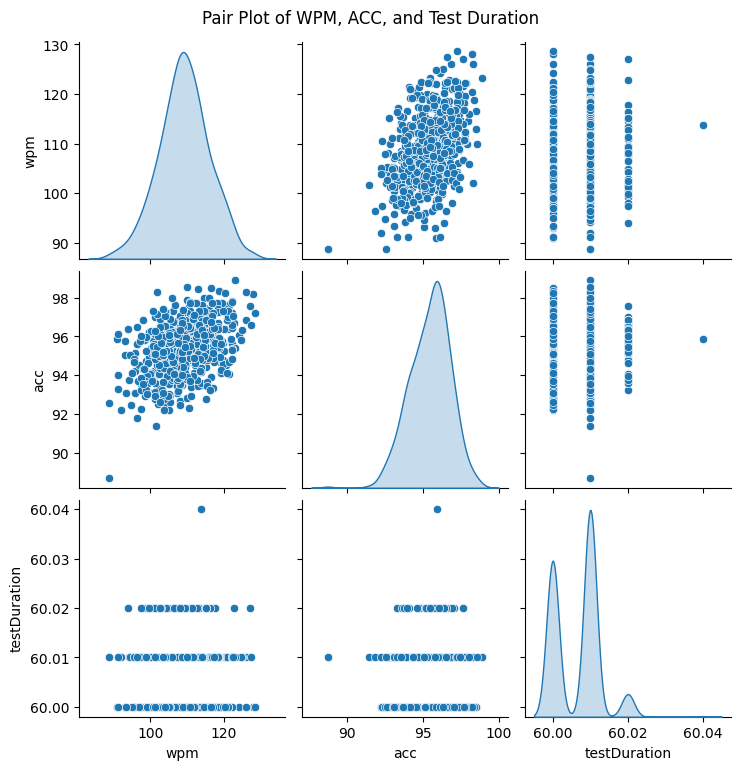

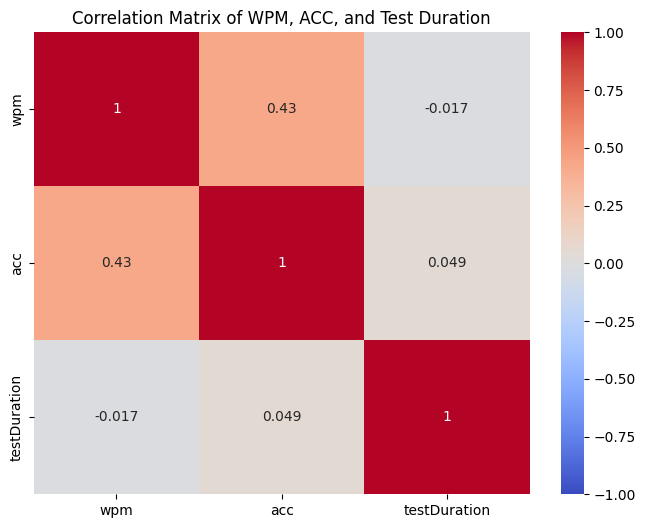

In [48]:
relevant_columns = ['wpm', 'acc', 'testDuration']

# Creating a pair plot to visualize relationships
sns.pairplot(df[relevant_columns], diag_kind='kde')
plt.suptitle('Pair Plot of WPM, ACC, and Test Duration', y=1.02)
plt.show()

# Calculating correlation coefficients
correlation_matrix = df[relevant_columns].corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of WPM, ACC, and Test Duration')
plt.show()

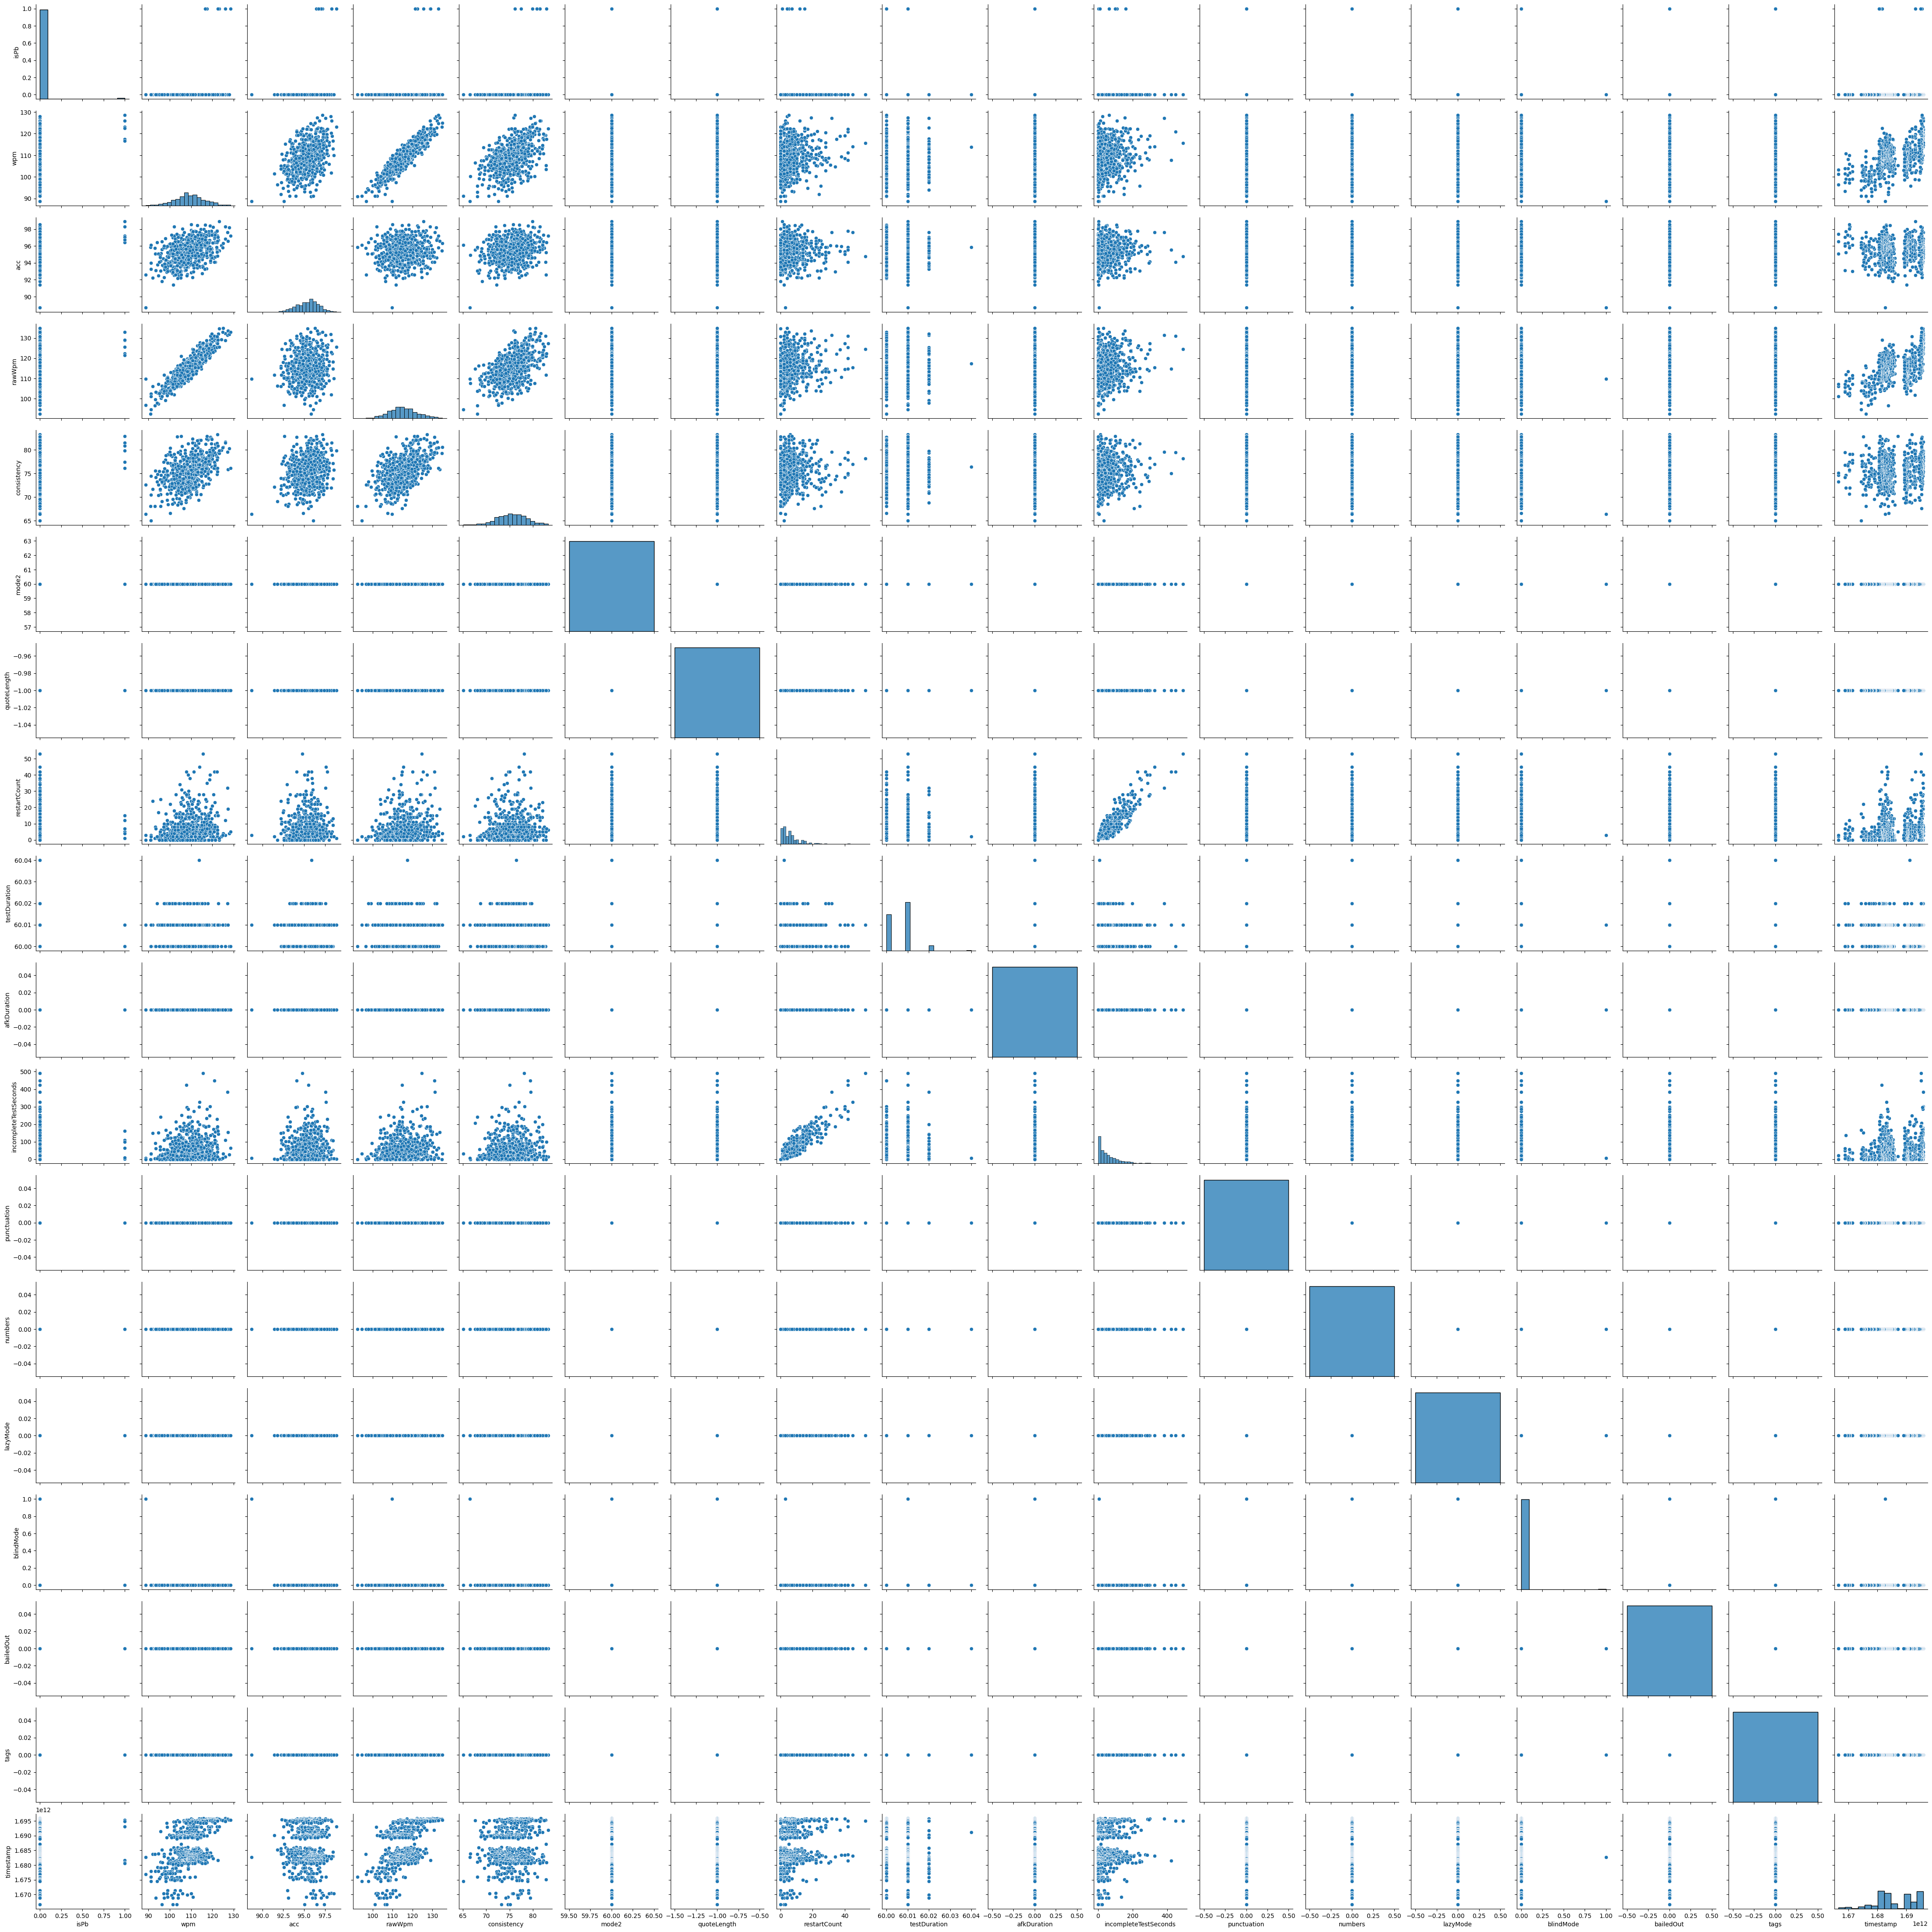

In [49]:
sns.pairplot(df)